In [8]:
import pandas as pd
import numpy as np

#### Week 3 - Pandas
Pandas, a library written by Wes McKinney, is a great tool for data manipulation and analysis. It provides two classes:
* a Series object, which handles a single column of data;
* a DataFrame object, which handles multiple columns (like an Excel spreadsheet).

You can build your own DataFrames or read in from other sources like CSVs or JSON. Pandas handles missing data beautifully; lets you sort, operate on and and merge datasets; provides plotting capabilities; and handles time series data (among other advantages).

#### 1.1 Creating Series and DataFrames

In [5]:
# Create a series by passing a list

towns = pd.Series(['Cardiff', 'Swansea', 'Abergavenny','Machynlleth'])
towns

0        Cardiff
1        Swansea
2    Abergavenny
3    Machynlleth
dtype: object

In [126]:
towns = ['Cardiff', 'Swansea', 'Abergavenny','Machynlleth']
populations = [335145, 230300, 12515, 2235]
number_of_pubs = [2100, 1680, 198, 48]

In [127]:
# Create an empty DataFrame, and add new columns to it

towns_df = pd.DataFrame()
towns_df['name'] = towns
towns_df['population'] = populations

In [128]:
# The columns have different dtypes

towns_df.dtypes

name          object
population     int64
dtype: object

In [129]:
# Create a DataFrame using dictionaries to specify column name and data

towns_df = pd.DataFrame({'name': towns,
                         'population': populations,
                         'n_pubs': number_of_pubs})

towns_df

,name,population,n_pubs
0,Cardiff,335145,2100
1,Swansea,230300,1680
2,Abergavenny,12515,198
3,Machynlleth,2235,48


#### 1.2 View and select data

In [130]:
# the .head() method shows the top rows

towns_df.head(2)

,name,population,n_pubs
0,Cardiff,335145,2100
1,Swansea,230300,1680


In [154]:
# check how many rows and columns
towns_df.shape

(4, 5)

In [131]:
# Inspect only one series using square bracket notation

towns_df['population']

0    335145
1    230300
2     12515
3      2235
Name: population, dtype: int64

In [132]:
# Or dot notation

towns_df.population

0    335145
1    230300
2     12515
3      2235
Name: population, dtype: int64

In [133]:
# Standard Python indexing works

towns_df.n_pubs[:3]

0    2100
1    1680
2     198
Name: n_pubs, dtype: int64

#### 1.3 Select and manipulate data

In [134]:
# Use Boolean indexing to inspect values based on a condition

towns_df[towns_df.name == 'Abergavenny']

,name,population,n_pubs
2,Abergavenny,12515,198


In [135]:
# Create a new column with math outputs

towns_df['pubs_per_capita'] = towns_df.n_pubs / towns_df.population
towns_df['people_per_pub'] = towns_df.population / towns_df.n_pubs

towns_df

,name,population,n_pubs,pubs_per_capita,people_per_pub
0,Cardiff,335145,2100,0.006266,159.592857
1,Swansea,230300,1680,0.007295,137.083333
2,Abergavenny,12515,198,0.015821,63.207071
3,Machynlleth,2235,48,0.021477,46.562500


In [136]:
# Use a single column's value to select data

towns_df[towns_df.people_per_pub < 150]

,name,population,n_pubs,pubs_per_capita,people_per_pub
1,Swansea,230300,1680,0.007295,137.083333
2,Abergavenny,12515,198,0.015821,63.207071
3,Machynlleth,2235,48,0.021477,46.562500


In [149]:
# Use the .sort_values() method
# Helpful parameter: set inplace = True if you want to modify your df

towns_df.sort_values(by = 'people_per_pub', inplace = True)

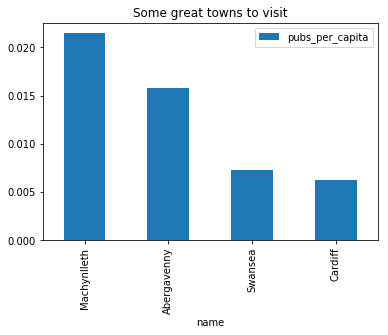

In [151]:
# Plot charts using the .plot() method 

towns_df.plot(x = 'name', y = 'pubs_per_capita', kind = 'bar', title = 'Some great towns to visit')

In [125]:
# Modify values

towns_df['to_visit'] = 'no'
towns_df.to_visit[towns_df.people_per_pub <50] = 'yes!'
towns_df

/Users/nicholasjones/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,name,population,n_pubs,pubs_per_capita,people_per_pub,to_visit
0,Cardiff,335145,2100,0.006266,159.592857,no
1,Swansea,230300,1680,0.007295,137.083333,no
2,Abergavenny,12515,183,0.014622,68.387978,no
3,Machynlleth,2235,48,0.021477,46.562500,yes!


### 2. NYC buildings - Load and clean a noisy dataset

#### 2.1 Read data from files

In [223]:
# Create a dataframe using read_csv()

filename = 'pluto_shortened.csv'
url = 'https://github.com/worldbank/Python-for-Data-Science/raw/master/week%203/pluto_shortened.csv'

df = pd.read_csv('pluto_18v2_1.csv')

/Users/nicholasjones/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (16,17,18,20,22,77) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [227]:
df = df[::20]

In [229]:
df.shape

(42950, 96)

In [221]:
!ls

Week 3 - Functions demo.ipynb pluto_18v2_1.csv
Week 3 - Functions.ipynb      pluto_shortened.csv
Week 3 - Pandas.ipynb         readme.md
dogNames.csv


In [219]:
# Inspect the dataframe (it may be messy)

df.head()

,Unnamed: 0,borough,block,lot,cd,ct2010,cb2010,schooldist,council,zipcode,...,firm07_flag,pfirm15_flag,rpaddate,dcasdate,zoningdate,landmkdate,basempdate,masdate,polidate,edesigdate
0,0,BX,5641.0,670.0,210.0,516.00,2.0,NaN,13.0,NaN,...,1.0,1.0,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
1,8000,SI,7864.0,67.0,503.0,244.02,1012.0,31.0,51.0,10307.0,...,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
2,16000,QN,11551.0,110.0,410.0,88.00,1009.0,27.0,32.0,NaN,...,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
3,24000,BK,6094.0,14.0,310.0,152.00,2002.0,20.0,43.0,11228.0,...,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
4,32000,QN,7791.0,2.0,411.0,1291.02,1001.0,26.0,23.0,11364.0,...,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018


In [220]:
df.shape

(108, 97)

#### 2.2 Clean dataset

In [211]:
# List the columns and select some

df.columns

my_cols = ['borough','numfloors','yearbuilt', 'landuse', 'zipcode', 'unitstotal', 'assesstot']
df = df[my_cols]

In [212]:
# Rename columns

df.columns

df.rename(columns = {'zipcode': 'zip', 'yearbuilt': 'year_built', 'unitstotal': 'housing_units', 'assesstotal': 'assessed_value_USD'},
         inplace = True)

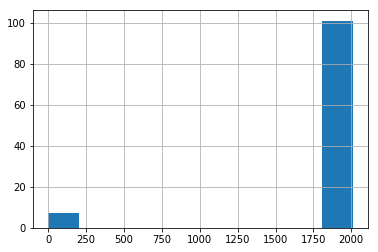

In [213]:
# Check distribution of year_built. Any problem?

df.year_built.hist()

/Users/nicholasjones/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


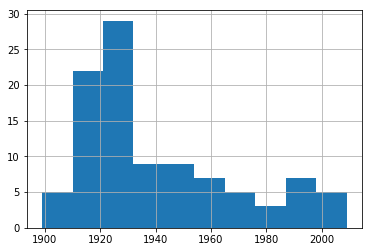

In [214]:
# Presumably few NYC buildings were constructed during the days of the early Roman Empire.
# So let's set year_built to np.nan for such values

df.year_built[df.year_built < 1000] = np.nan

df.year_built.hist()

In [215]:
# How many missing values do the columns have?
# We could drop rows with missing values, or impute them based on mean, median or another strategy.

df.isnull().sum()

#df.dropna(inplace = True)

borough          0
numfloors        0
year_built       7
landuse          1
zip              4
housing_units    0
assesstot        0
dtype: int64

#### 2.3 Compute summary statistics

In [216]:
# Use methods like max, min and mean() on a column

df.numfloors

0      0.00
1      2.00
2      0.00
3      2.00
4      1.00
5      2.00
6      2.00
7      2.00
8      2.00
9      1.00
10     2.50
11     1.50
12     2.00
13     2.00
14     2.00
15     2.00
16     2.00
17     1.00
18     2.00
19     1.50
20     2.00
21     2.00
22     2.00
23     2.00
24     2.00
25     2.00
26     2.00
27     2.00
28     4.00
29     2.00
       ... 
78     1.00
79     2.00
80     3.00
81     2.00
82     2.00
83     2.00
84     2.00
85     2.00
86     1.00
87     2.00
88     2.00
89     1.50
90     0.00
91     1.00
92     2.00
93     2.00
94     2.00
95     0.00
96     2.50
97     2.75
98     2.50
99     2.00
100    2.00
101    0.00
102    3.00
103    0.00
104    2.00
105    0.00
106    3.00
107    7.00
Name: numfloors, Length: 108, dtype: float64

In [217]:
df.shape

(108, 7)